<a href="https://colab.research.google.com/github/vicabc/sloan-DR14/blob/main/transformacao_de_coordenadas-DR14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar bibliotecas astropy
from astropy import units as u

from astropy.coordinates import SkyCoord

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
sloan= pd.read_csv('/content/sloan10')

In [4]:
sloan.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
#criamos um espaço para os dados variando entre o min e o max 
ra1= np.arange(8,2670,0.1)
dec1= np.arange(-5,70,0.1)

In [6]:
ra1 = sloan['ra']
dec1 = sloan['dec']
teste=SkyCoord(ra1*u.deg,dec1*u.deg,frame='icrs')
teste

<SkyCoord (ICRS): (ra, dec) in deg
    [(183.5313257,  0.08969303), (183.5983705,  0.13528503),
     (183.6802074,  0.12618509), ..., (131.5525623, 51.66698638),
     (131.4771511, 51.75306779), (131.6650121, 51.80530747)]>

In [7]:
print(teste.ra)
print(teste.dec)

[183d31m52.77252s 183d35m54.1338s 183d40m48.74664s ... 131d33m09.22428s
 131d28m37.74396s 131d39m54.04356s]
[0d05m22.894908s 0d08m07.0261152s 0d07m34.2663312s ... 51d40m01.150968s
 51d45m11.044044s 51d48m19.106892s]


In [8]:
#criamos uma variavel q contenha todas as ascensoes retas do dataset
ra2=teste.ra
dec2=teste.dec

In [9]:
#transformamos nossos dados ra,dec para coordenadas equatoriais
teste_gal=teste.galactic
teste_gal

<SkyCoord (Galactic): (l, b) in deg
    [(283.06446052, 61.51377155), (283.1697501 , 61.57746596),
     (283.33955742, 61.59330901), ..., (166.98590569, 38.51405026),
     (166.88017699, 38.46166128), (166.80335603, 38.57402371)]>

In [10]:
#criamos uma nova variavel q contenha todos os dados transformados
ra3 = teste_gal.l
dec3 = teste_gal.b

In [12]:
ra3

<Longitude [283.06446052, 283.1697501 , 283.33955742, ..., 166.98590569,
            166.88017699, 166.80335603] deg>

In [13]:
sloan['l']= ra3
sloan['l']

0       283.064461
1       283.169750
2       283.339557
3       283.769013
4       283.762324
           ...    
9995    167.160338
9996    166.993084
9997    166.985906
9998    166.880177
9999    166.803356
Name: l, Length: 10000, dtype: float64

In [14]:
sloan['b']=dec3
sloan['b']
sloan['teste']=1

In [15]:
sloan

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,teste
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,267,3.722360e+18,STAR,-0.000009,3306,54922,491,283.064461,61.513772,1
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,267,3.638140e+17,STAR,-0.000055,323,51615,541,283.169750,61.577466,1
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,268,3.232740e+17,GALAXY,0.123111,287,52023,513,283.339557,61.593309,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,269,3.722370e+18,STAR,-0.000111,3306,54922,510,283.769013,61.576636,1
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,269,3.722370e+18,STAR,0.000590,3306,54922,512,283.762324,61.630713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,...,161,5.033450e+17,GALAXY,0.027583,447,51877,246,167.160338,38.375884,1
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,...,162,5.033400e+17,GALAXY,0.117772,447,51877,228,166.993084,38.361225,1
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,...,162,8.222620e+18,STAR,-0.000402,7303,57013,622,166.985906,38.514050,1
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,...,163,5.033400e+17,GALAXY,0.014019,447,51877,229,166.880177,38.461661,1


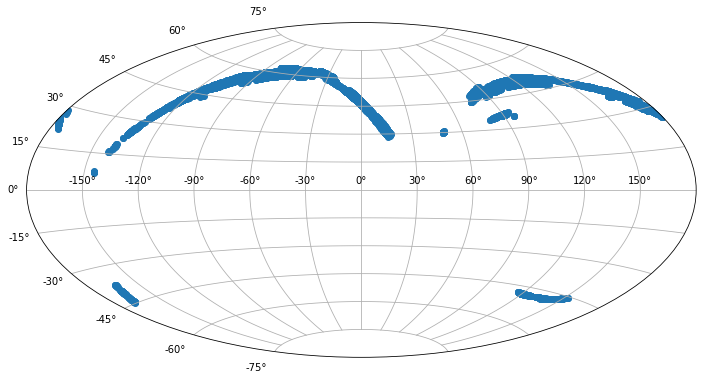

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(ra3.wrap_at('180d').radian, dec3.radian)